# Table of Contents
1. Problem Definition
2. Load Data and Split Data for train and test
3. Exploring Data Analysis
   - 3.1 Descriptive Analysis
   - 3.2 Data Visualisation
4. Data Preparation
5. Select and Train Models
6. Model Evaluation
7. Finalise Model and Predict
   - 7.1 Finalise Model
   - 7.2 Make Prediciton
   - 7.3 Save prediction into a csv filezip file.

# 1. Project Definition
## Development of an AI-Enhanced Fall Detection System for Elderly Care

This project aims to develop an AI-enhanced fall detection system to address the significant risks falls pose to the elderly in homes and care facilities. By integrating machine learning algorithms with sensor data and possible computer vision, the project seeks to detect falls in real time and automatically alert caregivers or emergency services. Using AI/ML techniques is central to providing rapid response and potentially life-saving intervention, enhancing the safety and quality of life for older adults by leveraging technology advancements in fall detection.

# 2. Load data

Dataset Source: https://www.kaggle.com/datasets/laavanya/elderly-fall-prediction-and-detection
The dataset consists of several columns, representing different sensor readings and health indicators needed to train a model that can identify a fall event.
**Distance:**  The distance covered by the individual which can indicate sudden movements or changes in walking patterns typical of a fall 
**Pressure:**  Indication of contact with the floor or an object, a potential sign of a fall
**HRV (Heart Rate Variability):**  Fluctuations in heart rate can signify stress or physical exertion related to a fall
**Sugar Level:**  Abnormal sugar levels indicating health state that can increase risk of falling
**SpO2 (Oxygen Saturation):**  Low levels might indicate health issues that could lead to dizziness and falls
**Accelerometer:**  Detects sudden movements or orientations that suggest a fall has occurred
**Decision:**  The target variable, indicating whether a (0) no fall detected, (1) person slipped/tripped/prediction of fall and (2) definite fall based on the sensor reading


In [5]:
import pandas as pd

# Load dataset containing sensor and health data relevant for fall detection
df = pd.read_csv('datasets/originaldataset.csv')

# Display the first few rows to understand the data better
print(df.head())

   Distance  Pressure      HRV  Sugar level    SpO2  Accelerometer  Decision
0    25.540         1  101.396       61.080  87.770              1         1
1     2.595         2  110.190       20.207  65.190              1         2
2    68.067         0   87.412       79.345  99.345              0         0
3    13.090         1   92.266       36.180  81.545              1         1
4    69.430         0   89.480       80.000  99.990              0         0


# 3. Exploring Data Analysis

In [6]:
# 3.1 Descriptive Analysis
# Display descriptive statistics of the dataset
print(df.describe())

          Distance     Pressure          HRV  Sugar level         SpO2  \
count  2039.000000  2039.000000  2039.000000  2039.000000  2039.000000   
mean     28.694527     0.988720    95.657002    72.909243    83.563649   
std      23.773644     0.815918    17.576499    46.940110    11.111592   
min       0.000000     0.000000    60.000000    10.000000    60.000000   
25%       7.642500     0.000000    82.418000    40.230000    75.285000   
50%      20.560000     1.000000    97.238000    69.960000    85.280000   
75%      55.205500     2.000000   109.695000    77.612500    92.692500   
max      69.981000     2.000000   124.980000   179.293000    99.990000   

       Accelerometer     Decision  
count    2039.000000  2039.000000  
mean        0.661599     0.988720  
std         0.473282     0.815918  
min         0.000000     0.000000  
25%         0.000000     0.000000  
50%         1.000000     1.000000  
75%         1.000000     2.000000  
max         1.000000     2.000000  


In [7]:
# Check for missing values in the dataset
print('Missing values in the dataset')
print(df.isnull().sum())

Missing values in the dataset
Distance         0
Pressure         0
HRV              0
Sugar level      0
SpO2             0
Accelerometer    0
Decision         0
dtype: int64


In [9]:
# Understanding the distribution of the target variable
print('Distribution of the target variable')
decision_distribution = df['Decision'].value_counts()
print(decision_distribution)

Distribution of the target variable
Decision
0    690
1    682
2    667
Name: count, dtype: int64


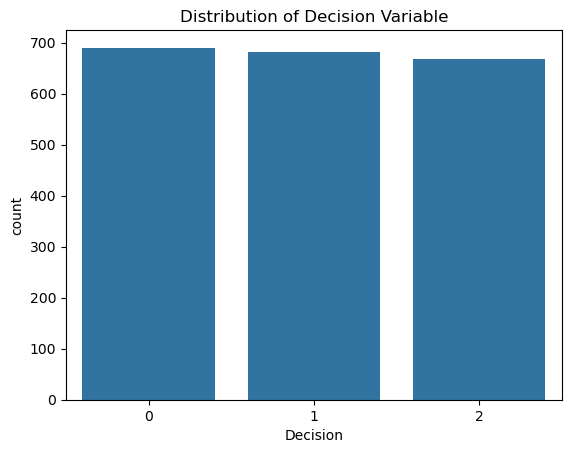

In [14]:
# 3.2 Data Visualisation
# Visualise the distribution of the 'Decision' variable to understand the balance or imbalance between fall and non-fall instances.

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Decision', data=df)
plt.title('Distribution of Decision Variable')
plt.show()

The distribution of the 'Decision' variable indicates that the dataset is relatively balanced among the categories.
This balance suggests that the model will not be inherently biased towards a particular outcome, mkeing it suitable for training
a machine learning model for fall detection.

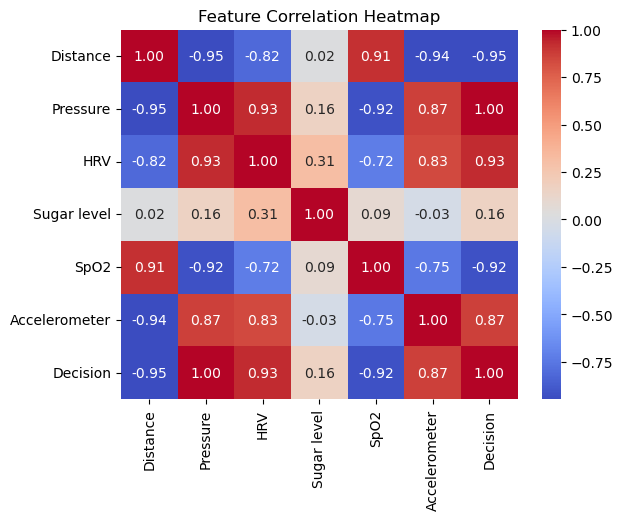

In [15]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

The heatmap shows a correlation between different fetures in the dataset.  Correlation values range from -1 to 1, where:  
+ A value close to 1 means there's a strong postive correlation, as one feature increases the other does too.  
+ A value close to -1 indictates a strong negative correclation, as one feature increases the other decreases.  
+ A value around 0 suggests no linear correlation between the features.  

Features that show strong correlations (either positive or negative) might carry similar information, which could affect the model's performance due to redundancy.  
Features with little to no correlation with others could provide unique information valuable for the fall detection model.  

To detect falls accurately having diverse and releveant data for the model to learn from improves its learning ability.

# 4. Data Preparation

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Define numeric and categorical features for preprocessing
numeric_features = ['Distance', 'HRV', 'Sugar level', 'SpO2', 'Accelerometer']
categorical_features = ['Pressure']

# Create transformers
# Numeric transformer pipeline for handling missing values and scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())]) 

# Categorical transformer pipeline for handling missing values and applying one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))]) 

# Combining preprocessing steps into a single transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features), # Apply numeric transformer to numeric features
        ('cat', categorical_transformer, categorical_features)]) # Apply categorical transformer to categorical features

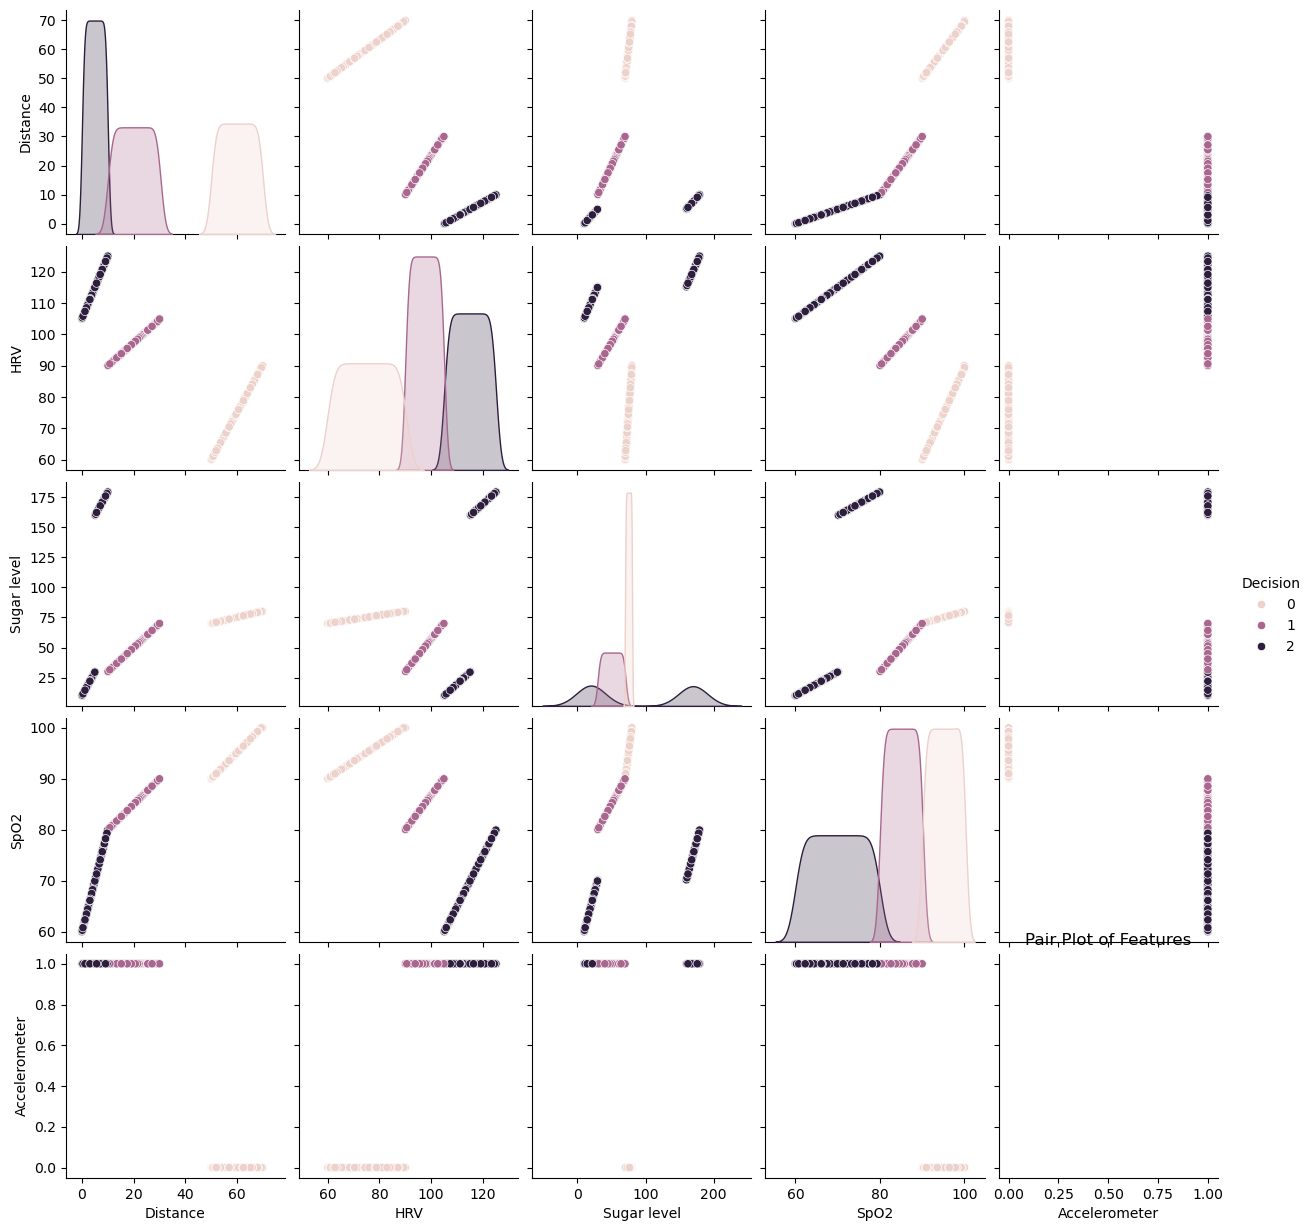

In [17]:
# Show subsets of features for clarity
features = numeric_features + ['Decision']
sns.pairplot(df[features], hue='Decision')
plt.title('Pair Plot of Features')
plt.show()


The pair plot shows how each feature in the dataset interacts and relates to each other, making it easy to identify outliers, see the range of each feature and spot patterns and feature relationships.  

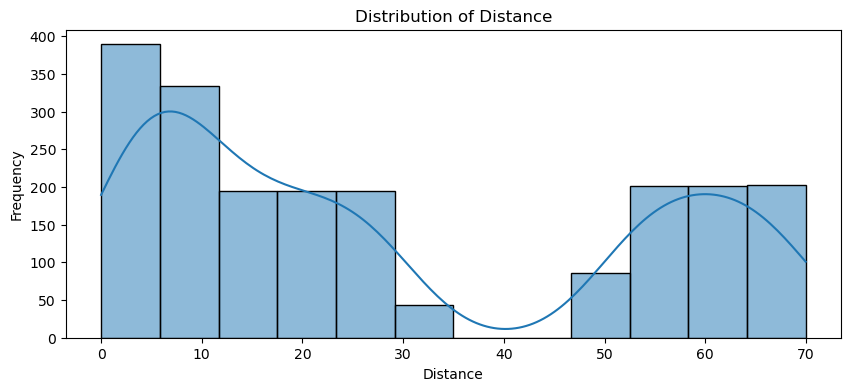

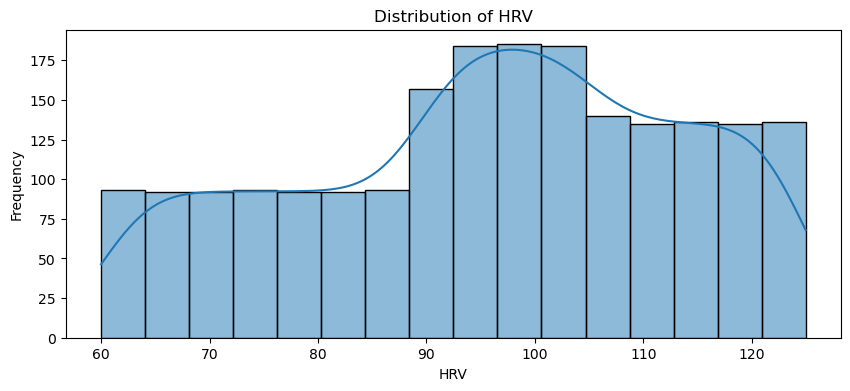

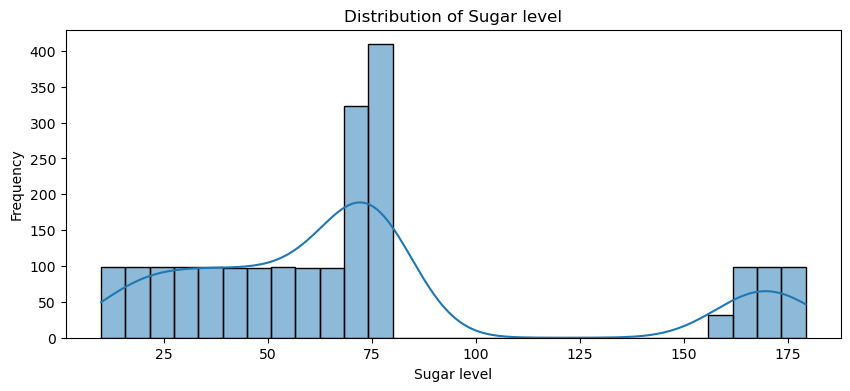

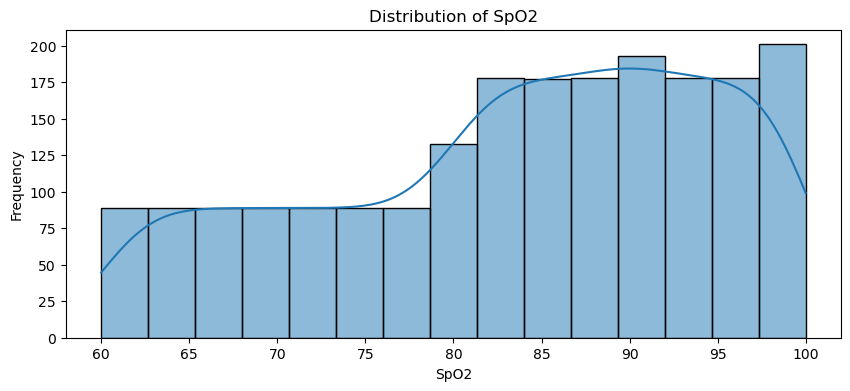

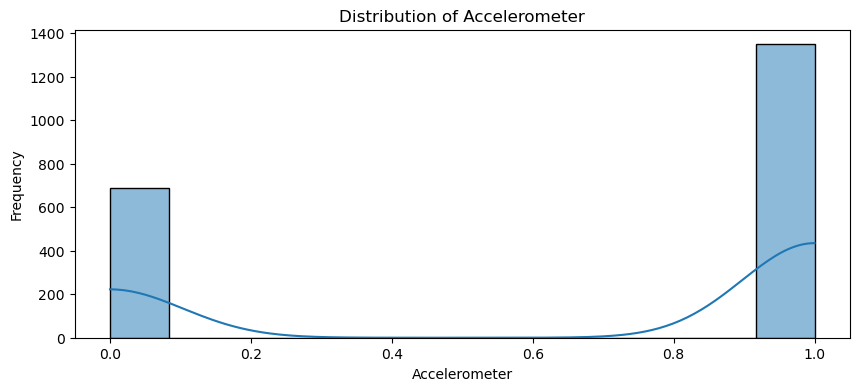

In [18]:
# Distribution plots for numerical features 
for column in numeric_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Understanding feature distribution helps to choose the right model and identify skewness and outliers.  
- **Distance:** Skewed with a wide range, indicating variability in physical activity
- **HRV (Heart Rate Variablity:** Symmetrical distribution with fluctuations potentially indicating stress or exertion from falls
- **Sugar Level:** Skewed distribution showing most indiviuals have moderate sugar levels but outliers may indicate health states increasing fall risk
- **SpO2 (Oxeygen Saturation**  Mostly high with higher values could indicate health conditions that could lead to a fall.
- **Accelerometer** Binary distribution showing direct fall detection through sudden acceleration changes. 

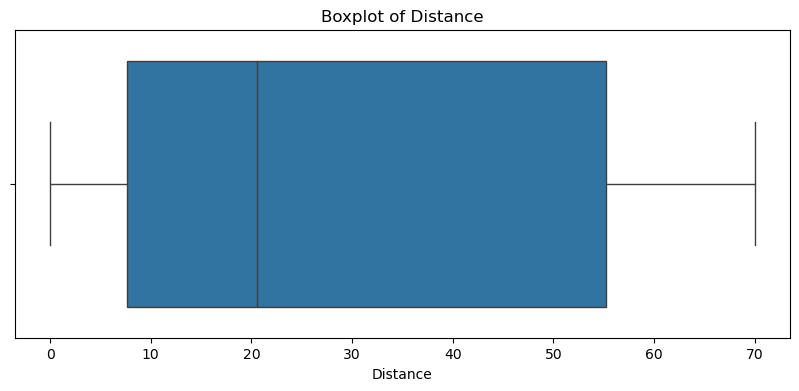

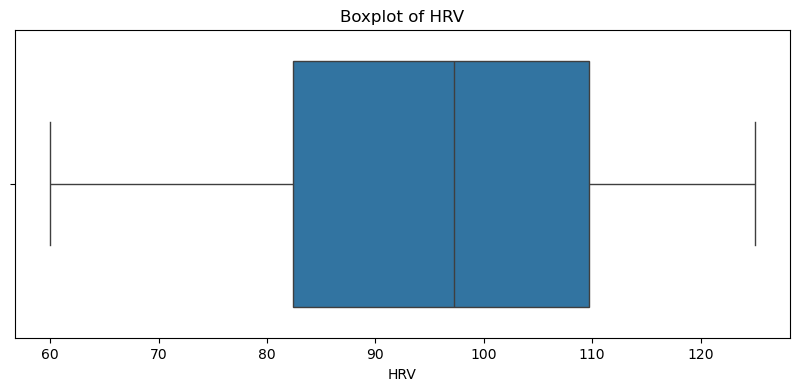

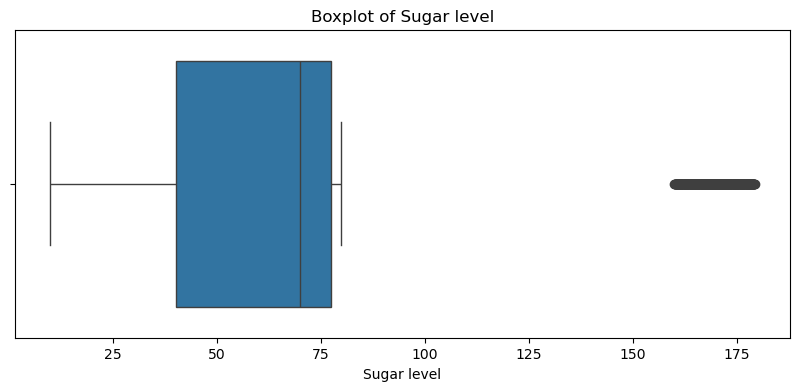

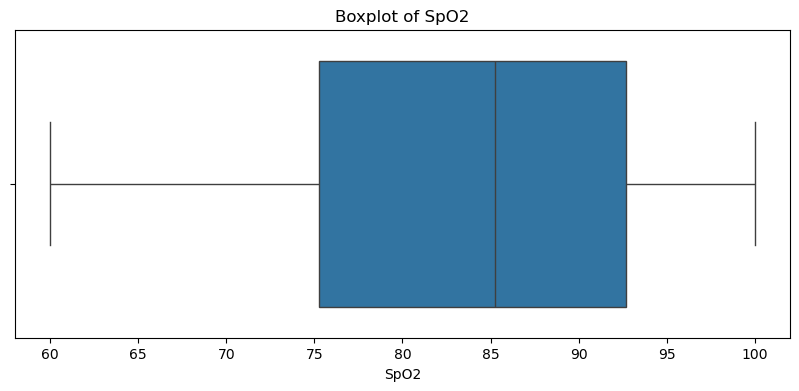

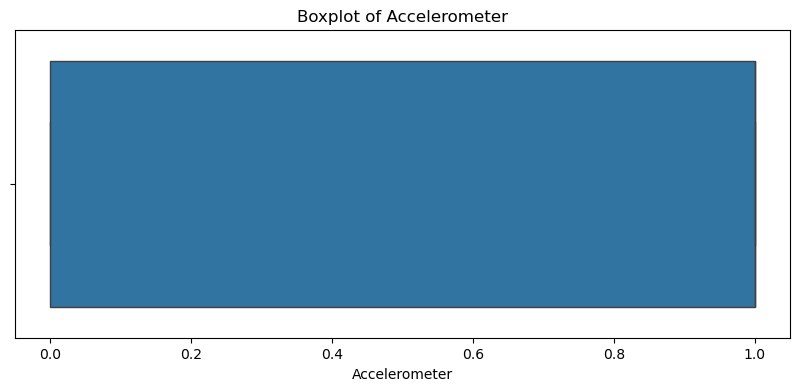

In [19]:
# Box plots to identify outliers
for column in numeric_features:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

The boxplot shows that most features have a range of values with some outliers as seen in 'Sugar Level'. These outliers may provide insights into abnormal conditions or events such as falls or health risks and can enhance the models accuracy and reliability. 

In [20]:
# Handling outliers before train-test split
q_low = df['Distance'].quantile(0.01)
q_hi = df['Distance'].quantile(0.99)

df_filtered = df[(df['Distance'] > q_low) & (df['Distance'] < q_hi)]

In [21]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features and the target variable
X = df.drop('Decision', axis=1)
y = df['Decision']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 5. Select and Train Models

In [23]:
# Train Random Forest and Gradient Boosting models.
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold

# Define model pipelines
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=0))
])

gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=0))
])

# Train models
rf_pipeline.fit(X_train, y_train)
gb_pipeline.fit(X_train, y_train)

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1_score': 'f1_weighted'
}

# Define scoring metrics
cv_strategy = StratifiedKFold(n_splits=5)

# Perform cross-validation
cv_results_rf = cross_validate(rf_pipeline, X, y, cv=cv_strategy, scoring=scoring)
cv_results_gb = cross_validate(gb_pipeline, X, y, cv=cv_strategy, scoring=scoring)


# 6. Model Evaluation

In [24]:
import numpy as np

# Print average scores
print(f"Random Forest Average CV Accuracy: {np.mean(cv_results_rf['test_accuracy'])}")
print(f"Gradient Boosting Average CV Accuracy: {np.mean(cv_results_gb['test_accuracy'])}")

Random Forest Average CV Accuracy: 1.0
Gradient Boosting Average CV Accuracy: 1.0


In [25]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1_score': make_scorer(f1_score, average='weighted')}

# Use StratifiedKFold for balanced folds
cv_strategy = StratifiedKFold(n_splits=5)

# Cross-validation for Random Forest
cv_results_rf = cross_validate(rf_pipeline, X, y, cv=cv_strategy, scoring=scoring)
print("Random Forest CV Results:")
print(f"Accuracy: {np.mean(cv_results_rf['test_accuracy'])} ± {np.std(cv_results_rf['test_accuracy'])}")
print(f"Precision: {np.mean(cv_results_rf['test_precision'])}")
print(f"Recall: {np.mean(cv_results_rf['test_recall'])}")
print(f"F1 Score: {np.mean(cv_results_rf['test_f1_score'])}")

# Cross-validation for Gradient Boosting
cv_results_gb = cross_validate(gb_pipeline, X, y, cv=cv_strategy, scoring=scoring)
print("\nGradient Boosting CV Results:")
print(f"Accuracy: {np.mean(cv_results_gb['test_accuracy'])} ± {np.std(cv_results_gb['test_accuracy'])}")
print(f"Precision: {np.mean(cv_results_gb['test_precision'])}")
print(f"Recall: {np.mean(cv_results_gb['test_recall'])}")
print(f"F1 Score: {np.mean(cv_results_gb['test_f1_score'])}")

Random Forest CV Results:
Accuracy: 1.0 ± 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Gradient Boosting CV Results:
Accuracy: 1.0 ± 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Both models achieved identical performance across all metrics, indicating a well balanced performance and a reliable fall detection system without bias towards over-predictiging or under-predicting fall events. They both accurately identified fall and no-fall events crucial for a fall detection system where missing a fall (false negative) or falsely alarming (false positive) could have serious implications.  Minimised false positives and false negatives ensures caregivers are alerted to real falls without being overloaded with false alarms.  

In [26]:
# 7. Finalise Model and Predict

In [27]:
# 7.1 & 7.2 Finalise the model based on evaluation metrics and use it to predict the test set.
final_model = rf_pipeline.fit(X_train, y_train)
# Make predictions on the test set
final_predictions = final_model.predict(X_test)

In [28]:
# Show sample predictons for the first 10 instances
sample_predictions = final_model.predict(X_test[:10])

# Create a DataFrame to display actual vs. predicted values
results_df = pd.DataFrame({'Actual': y_test[:10].values, 'Predicted': sample_predictions})
print(results_df)

   Actual  Predicted
0       1          1
1       1          1
2       2          2
3       2          2
4       2          2
5       2          2
6       1          1
7       1          1
8       0          0
9       1          1


The comparision between actual and predicted results shows the model is accurate, with all predictions matching the real outcomes, indicating it can reliabley detect falls.

In [29]:
from sklearn.metrics import classification_report
# Make predictions and evaluate to see precision, recall and F1-score
y_pred = final_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       151
           2       1.00      1.00      1.00       136

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



The model is accurate and balanced, correctly identifying fall events with few mistakes, making it dependable for fall detection.

In [30]:
#Generate feature names from a ColumnTransformer instance.
def get_feature_names(column_transformer):
    feature_names = []
    
    # Loop through each transformer within the ColumnTransformer
    for transformer in column_transformer.transformers_:
        transformer_name, transformer_obj, transformer_columns = transformer
        
        # Handle case for transformers applied to columns
        if transformer_name != 'remainder':
            if hasattr(transformer_obj, 'get_feature_names_out'):  # For transformers with this method
                names = transformer_obj.get_feature_names_out(transformer_columns)
                feature_names.extend(names)
            elif hasattr(transformer_obj, 'categories_'):  # For OneHotEncoder without get_feature_names_out
                names = []
                for i, column in enumerate(transformer_columns):
                    categories = transformer_obj.categories_[i]
                    names.extend([f"{column}_{category}" for category in categories])
                feature_names.extend(names)
            else:  # Transformers without a method to get feature names
                feature_names.extend(transformer_columns)
                
    return feature_names

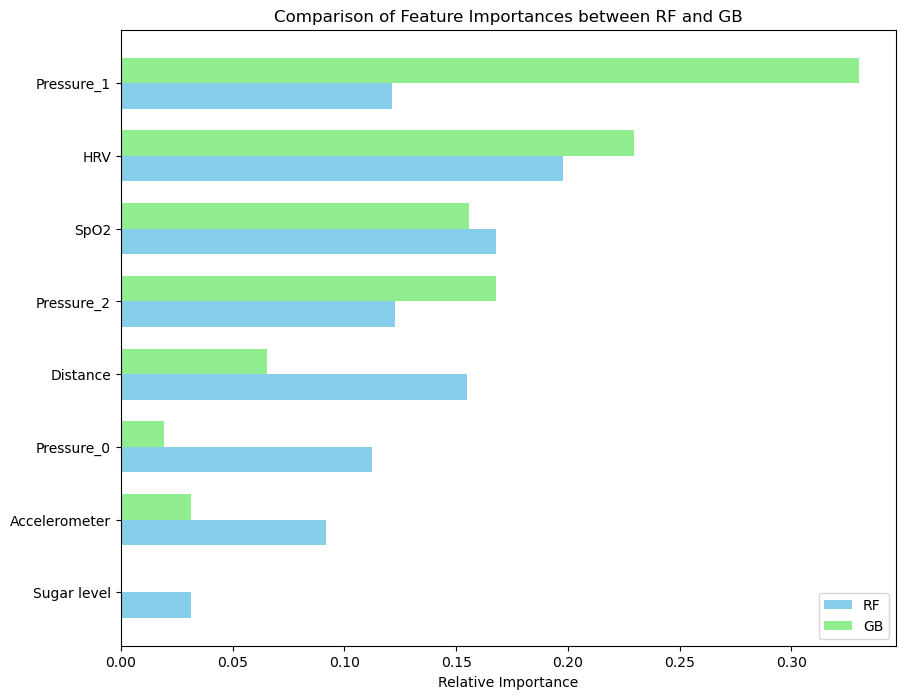

In [31]:
# Retreive feature names after preprocessing to ensure correct labelling
feature_names = get_feature_names(preprocessor)

# Retrain models on training data for extracting feature importances
rf_pipeline.fit(X_train, y_train)
gb_pipeline.fit(X_train, y_train)


# Extract feature importances from both models
feature_importances_rf = rf_pipeline.named_steps['classifier'].feature_importances_
feature_importances_gb = gb_pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame to hold feature names and their importances from both models
df_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance_RF': feature_importances_rf,
    'Importance_GB': feature_importances_gb
})

# Normalise the importance scores so they sum up to 1, allowing for comparison between models
df_importances['Importance_RF'] /= df_importances['Importance_RF'].sum()
df_importances['Importance_GB'] /= df_importances['Importance_GB'].sum()

# Calculate the sum of importances from both models to see which features are overall considered more important
df_importances['Sum_Importance'] = df_importances['Importance_RF'] + df_importances['Importance_GB']
df_importances.sort_values(by='Sum_Importance', ascending=True, inplace=True)

# Plot the feature importances
plt.figure(figsize=(10, 8))
bar_width = 0.35
index = np.arange(len(df_importances))

plt.barh(index - bar_width/2, df_importances['Importance_RF'], bar_width, color='skyblue', label='RF')
plt.barh(index + bar_width/2, df_importances['Importance_GB'], bar_width, color='lightgreen', label='GB')

plt.xlabel('Relative Importance')
plt.title('Comparison of Feature Importances between RF and GB')
plt.yticks(index, df_importances['Feature'])
plt.legend()
plt.show()



The comparison of feature importance between the Random Forest (RF) and Gradient Boosting (GB) models shows which factors each model finds most crucial in predicting falls.  In this model 'Distance' and 'Accelerometer' indicate a fall or no fall event showing that RF is a more proficient model for detecting falls.  

In [32]:
# 7.3 Save the final predictions to a CSV file
# This output can be used for future outcomes in real-world applications to alert caregivers or medical staff of potential fall events. 
final_predictions_df = pd.DataFrame(final_predictions, columns=['Predicted_Fall'])
final_predictions_df.to_csv('datasets/final_predictions.csv', index=False)